## Mahdi Anvari 610700002 Homework 2 of Machine Learning Question 2

In [100]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Dataset: 
• Load MNIST dataset (could be accessed using from keras.datasets in python)
• Separate them by label into 10 smaller sets

In [116]:
mnist_path = 'c:/Users/M/Downloads/mnist.npz'
with np.load(mnist_path, allow_pickle=True) as f:
    X_train, Y_train = f['x_train'], f['y_train']
    X_test, Y_test = f['x_test'], f['y_test']

X_all = np.concatenate((X_train, X_test), axis=0)
Y_all = np.concatenate((Y_train, Y_test), axis=0)
print((X_all.shape))
print((Y_all.shape))

Sets = [[] for _ in range(10)]
Sets2 = [[] for _ in range(10)]
for i in range(len(X_all)):
    label = Y_all[i]
    Sets[label].append(X_all[i])
    Sets2[label].append(X_all[i])

for i in range(10):
    print(f"Length of label {i} is: ",len(Sets[i]))

(70000, 28, 28)
(70000,)
Length of label 0 is:  6903
Length of label 1 is:  7877
Length of label 2 is:  6990
Length of label 3 is:  7141
Length of label 4 is:  6824
Length of label 5 is:  6313
Length of label 6 is:  6876
Length of label 7 is:  7293
Length of label 8 is:  6825
Length of label 9 is:  6958


a. Flatten the pictures and apply PCA

In [117]:
for i in range(10):
    Sets[i] = np.array(Sets[i])
    Sets2[i] = np.array(Sets[i])
print(Sets[0].shape)
for i in range(10):
    Sets[i] = (Sets[i]).reshape(Sets[i].shape[0],-1)
print(Sets[0].shape)

(6903, 28, 28)
(6903, 784)


In [103]:
NormalizedSets = [[] for _ in range(10)]
for i in range(10):
    scaler = StandardScaler()
    NormalizedSets[i] = scaler.fit_transform(Sets[i])
print(NormalizedSets[0].shape)

(6903, 784)


In [104]:
PCASets = [[] for _ in range(10)]
for i in range(10):
    NormalizedSets[i] = scaler.fit_transform(Sets[i])
    pca = PCA(n_components=50)
    pca.fit(NormalizedSets[i])
    PCASets[i] = pca.transform(NormalizedSets[i])
print(PCASets[0].shape)

(6903, 50)


b. Plot first PC vs. Second PC

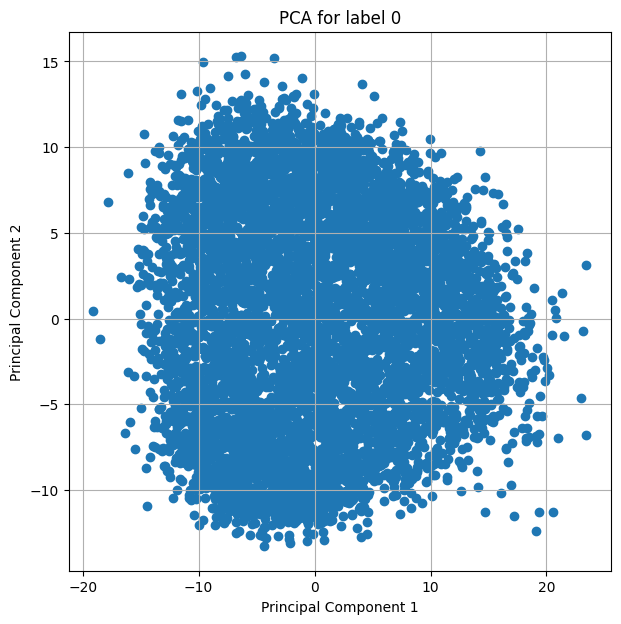

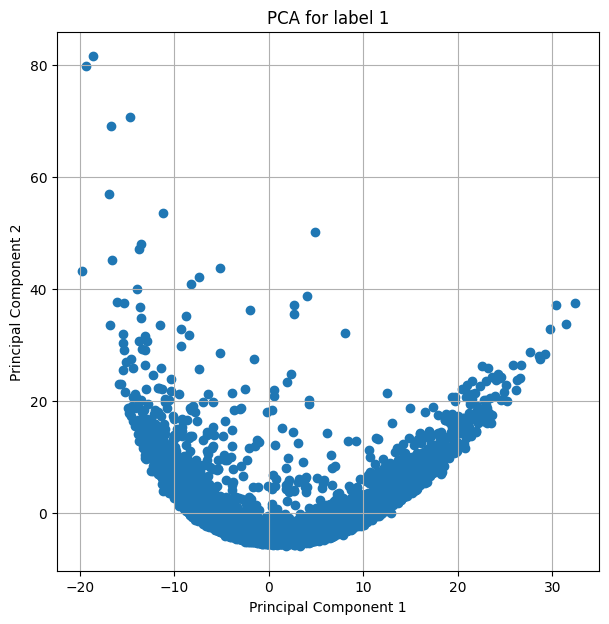

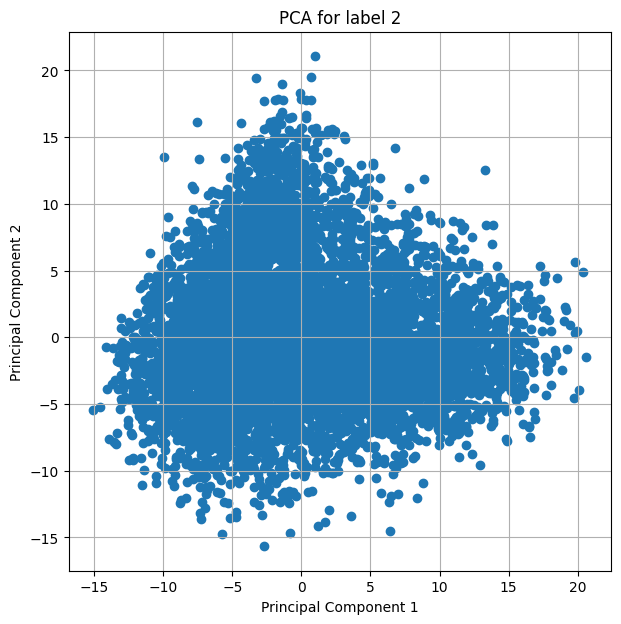

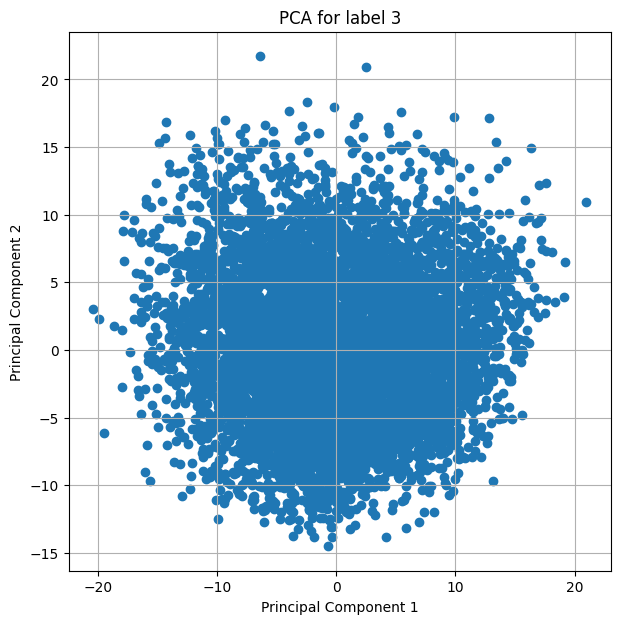

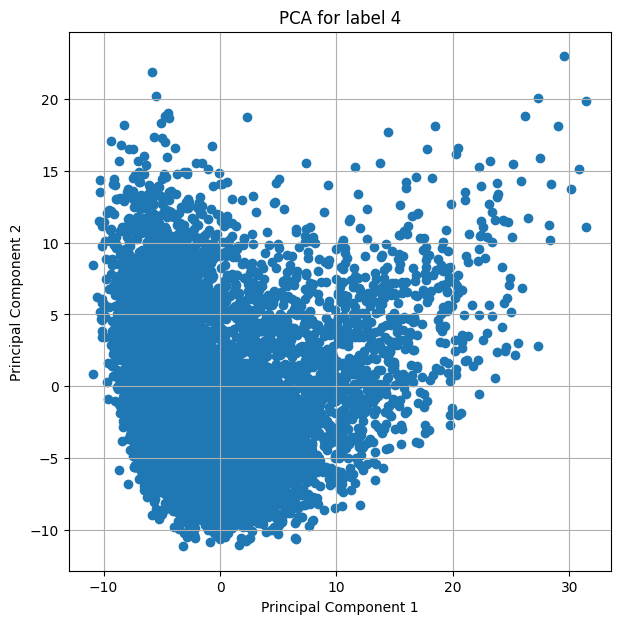

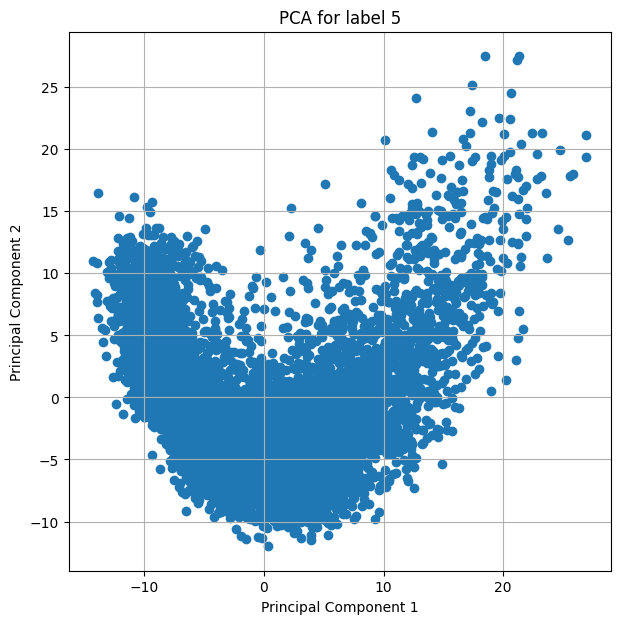

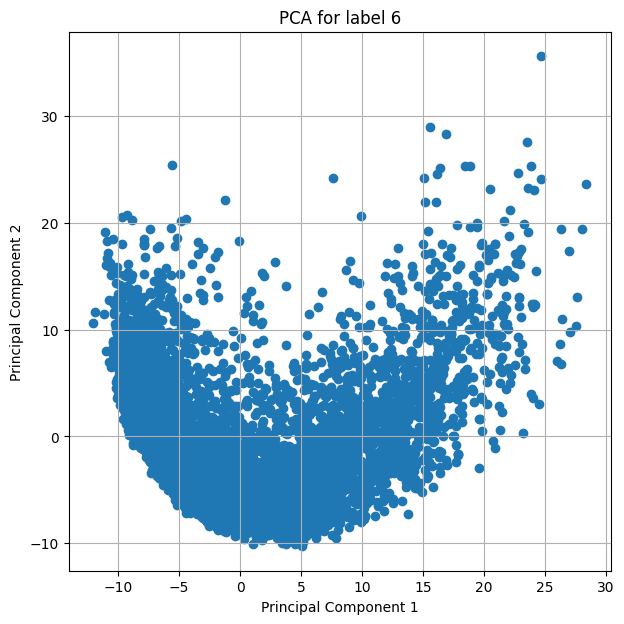

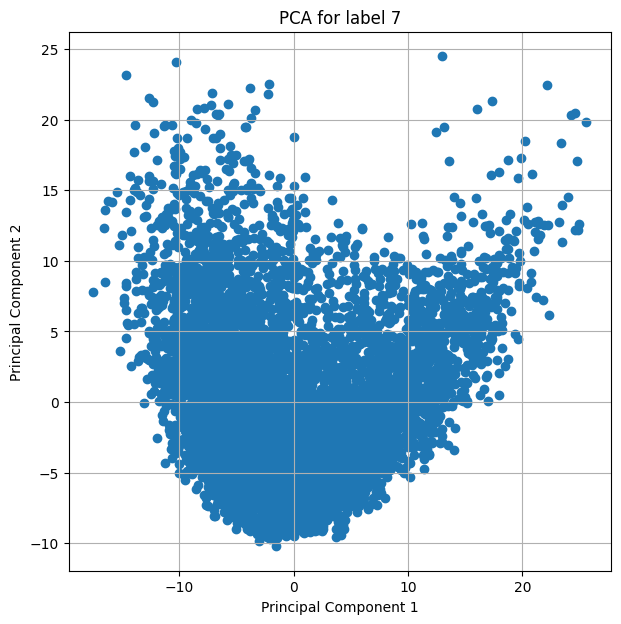

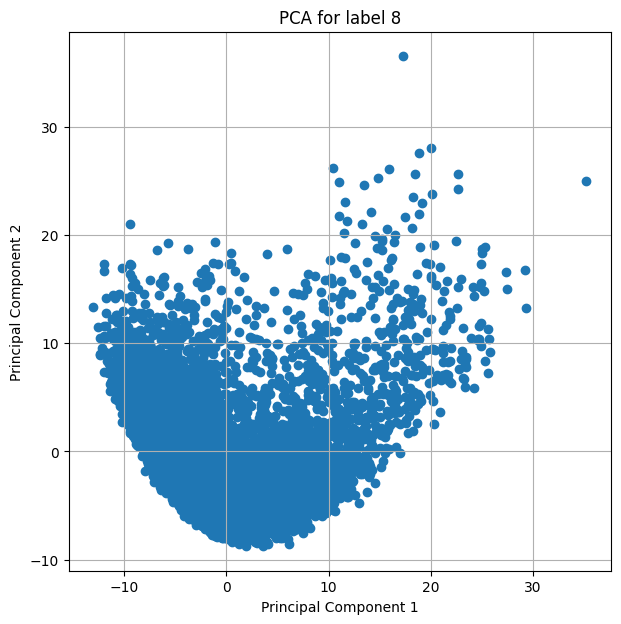

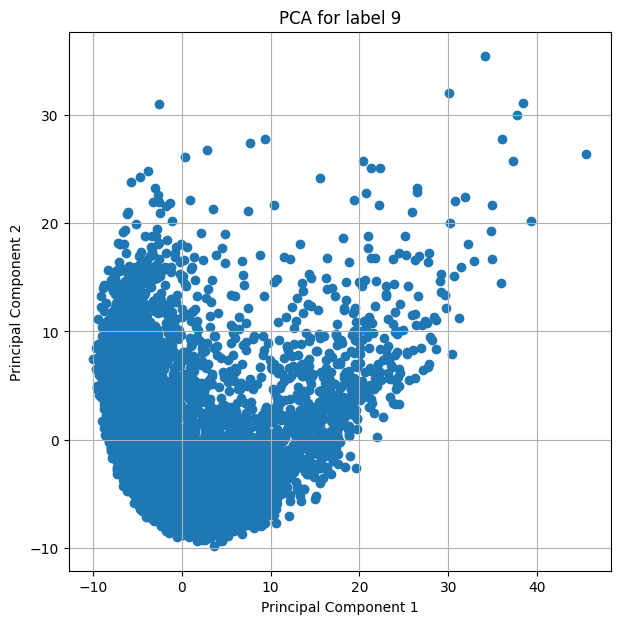

In [105]:
for i in range(10):
    plt.figure(figsize=(7, 7))
    plt.scatter(PCASets[i][:, 0], PCASets[i][:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA for label {i}')
    plt.grid(True)
    plt.show()

c. Assume the points in this scatter plot are spread between (𝑥1, 𝑥2
) and (𝑦1, 𝑦2
) (which 
are the min and max of PC1 and PC2). Split this space into a 5x5 grid, and for each 
cell select a point that is closest to the center of that cell. Highlight these points in the 
scatter plot from the previous step.

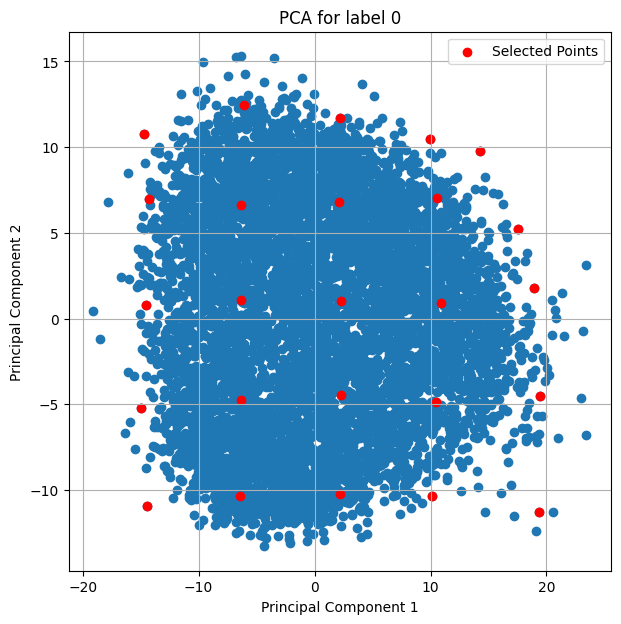

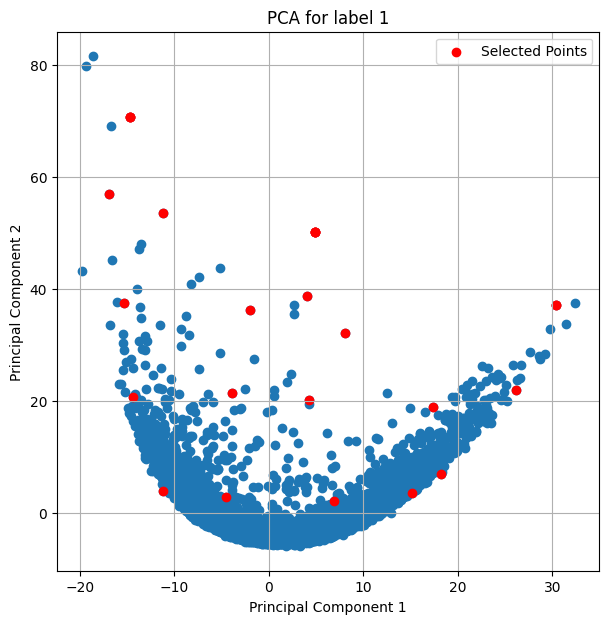

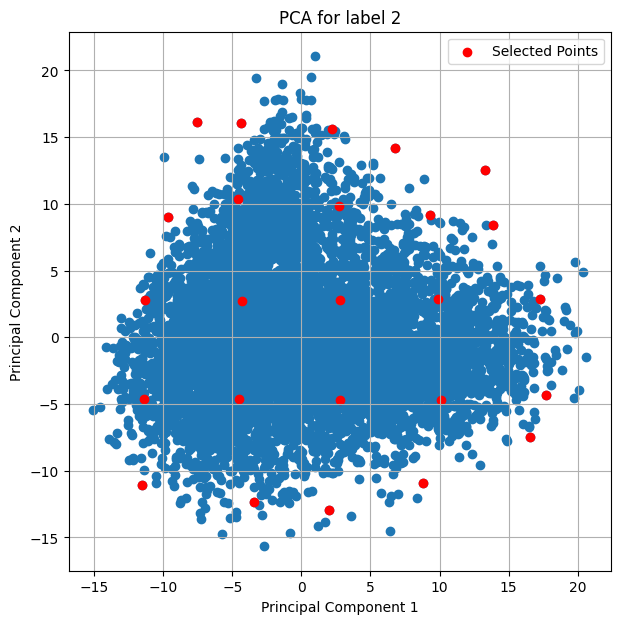

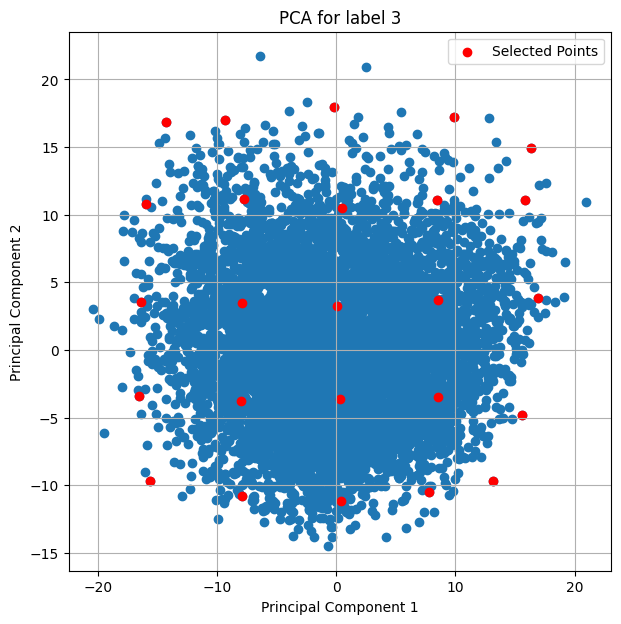

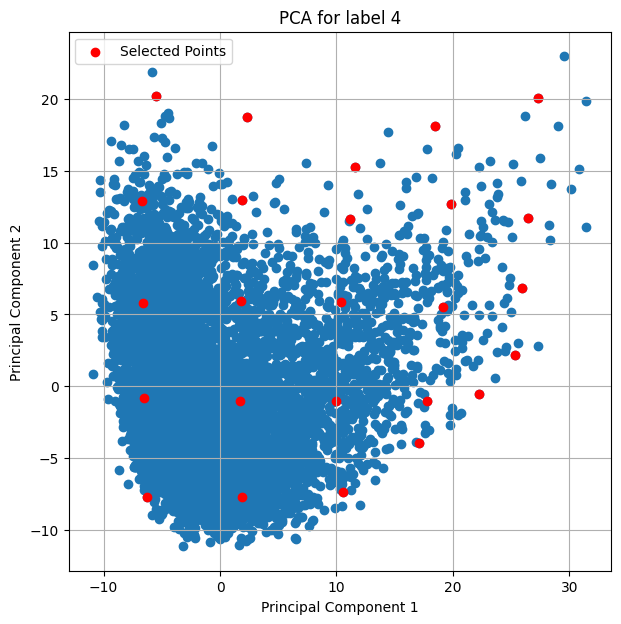

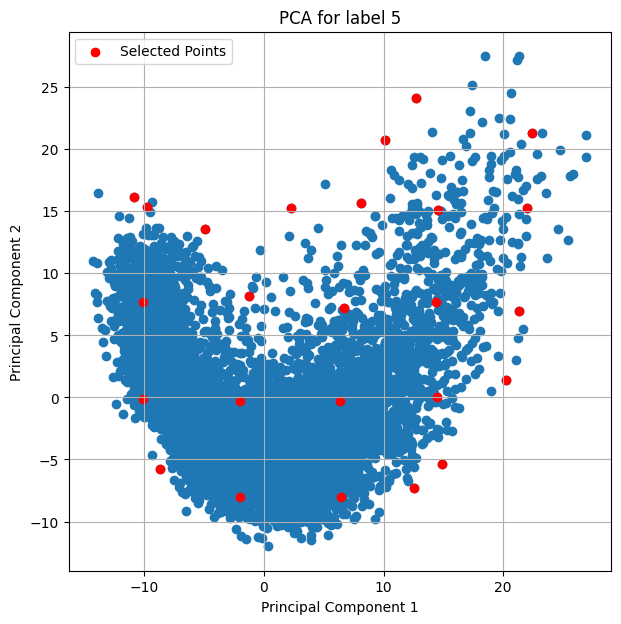

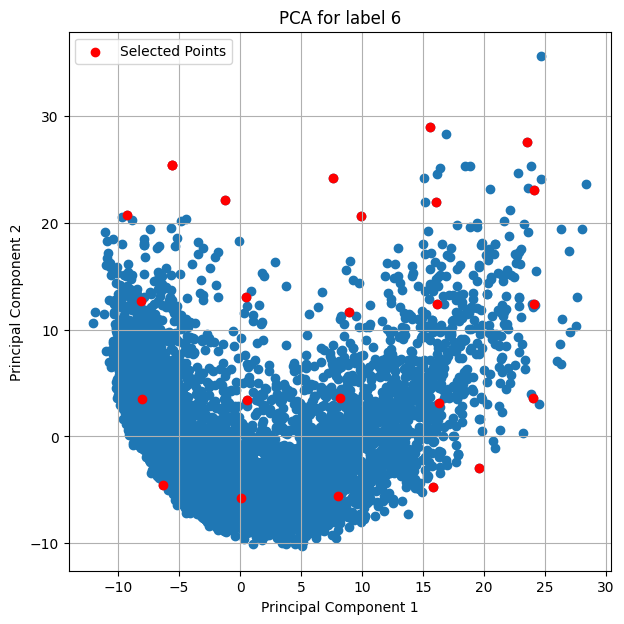

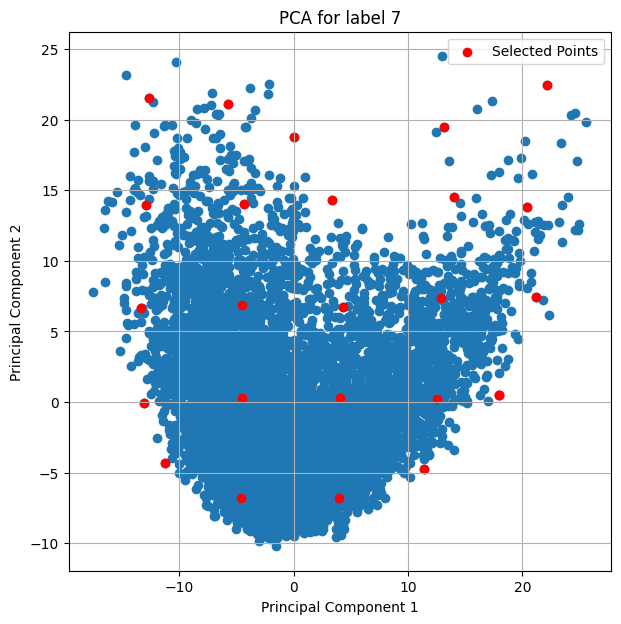

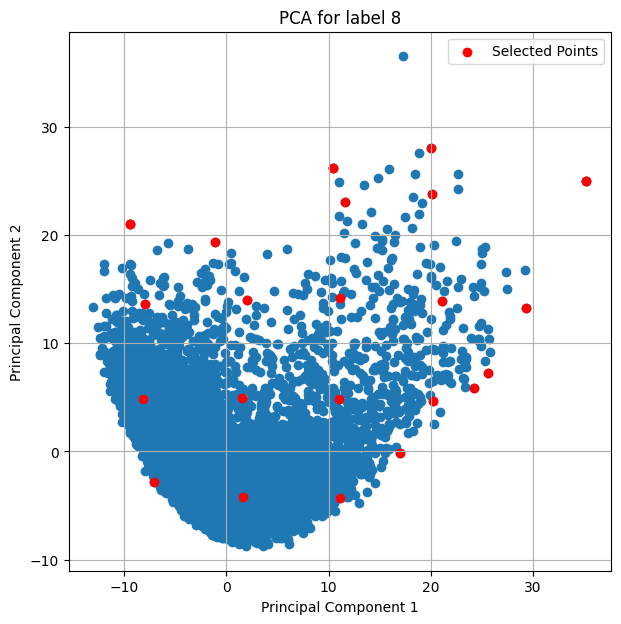

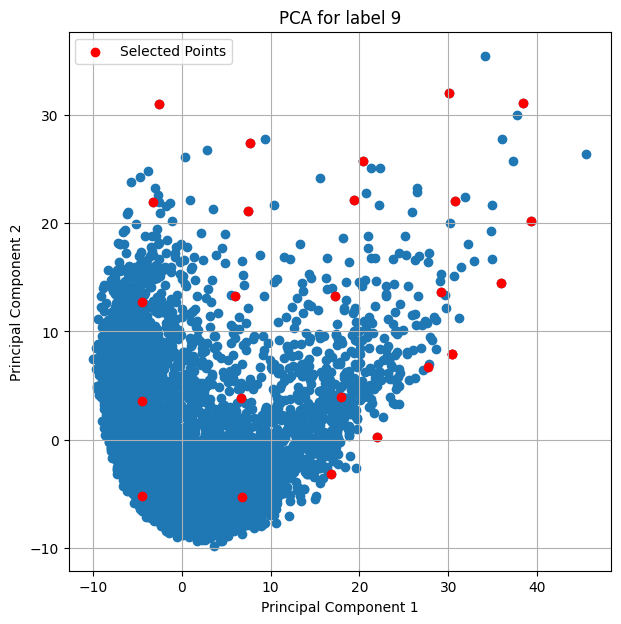

In [106]:
PointsList = []
for s in range(10):
    x1, x2 = np.min(PCASets[s][:, 0]), np.max(PCASets[s][:, 0])
    y1, y2 = np.min(PCASets[s][:, 1]), np.max(PCASets[s][:, 1])
    #print(x1,x2)
    #print(y1,y2)
    
    gridX = np.linspace(x1, x2, 6)
    gridY = np.linspace(y1, y2, 6)
    #print(gridX)
    #print(gridY)
    
    Points = []
    for i in range(len(gridX)-1):
        for j in range(len(gridY)-1):
            centerX = (gridX[i] + gridX[i+1]) / 2
            centerY = (gridY[j] + gridY[j+1]) / 2
            distance = np.sqrt((PCASets[s][:, 0] - centerX)**2 + (PCASets[s][:, 1] - centerY)**2)
            closest = np.argmin(distance)
            Points.append(closest)
    PointsList.append(Points)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(PCASets[s][:, 0], PCASets[s][:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA for label {s}')
    
    Points = np.array(Points)
    plt.scatter(PCASets[s][Points, 0], PCASets[s][Points, 1], color='red', marker='o', label='Selected Points')
    plt.legend()
    
    plt.grid(True)
    plt.show()

d. Draw the original pictures corresponding to the 25 selecting points.
(See figure 14.23 of Element of Statistical Learning for an example)

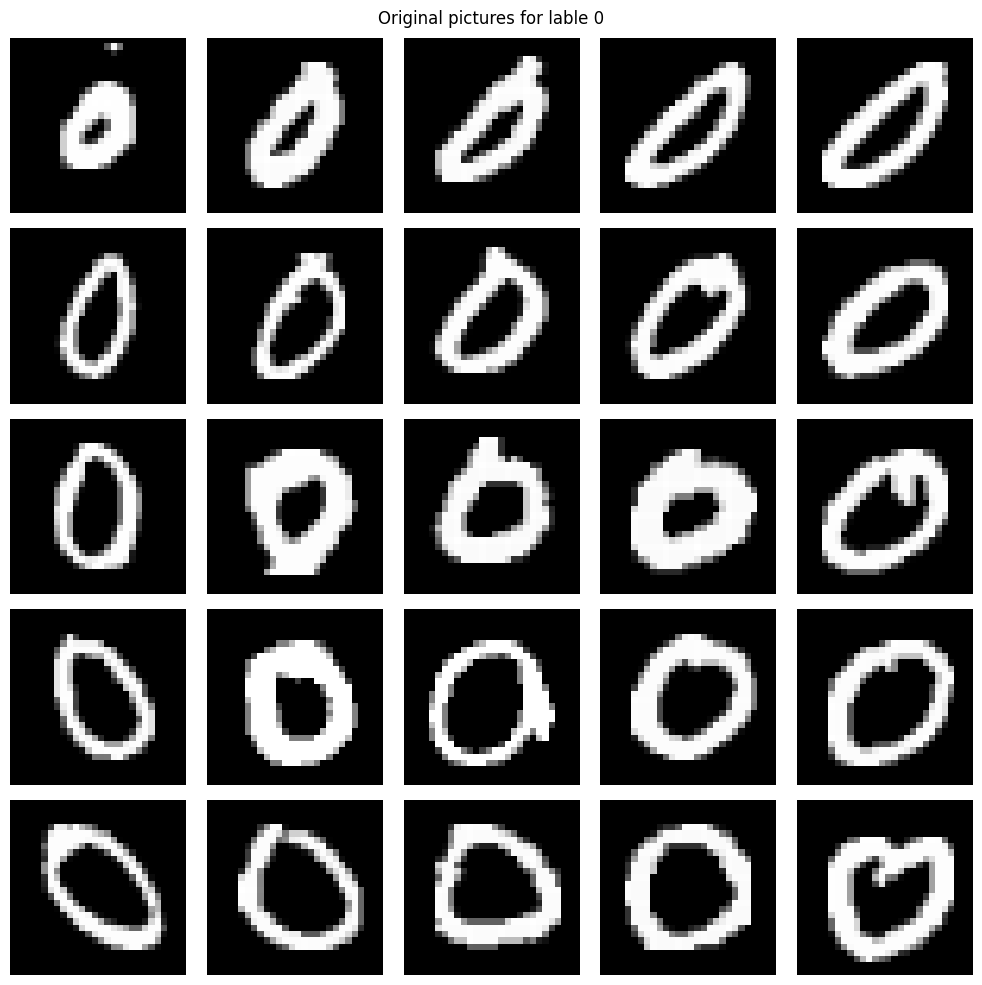

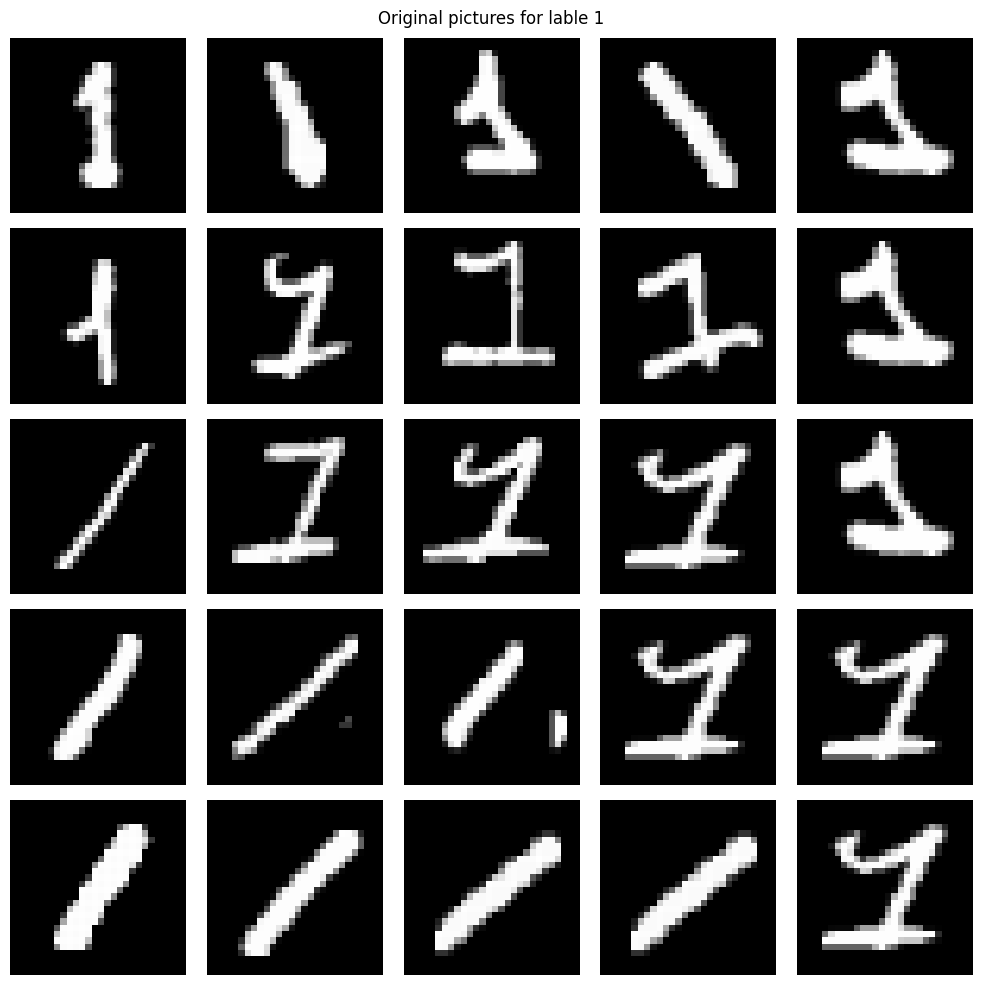

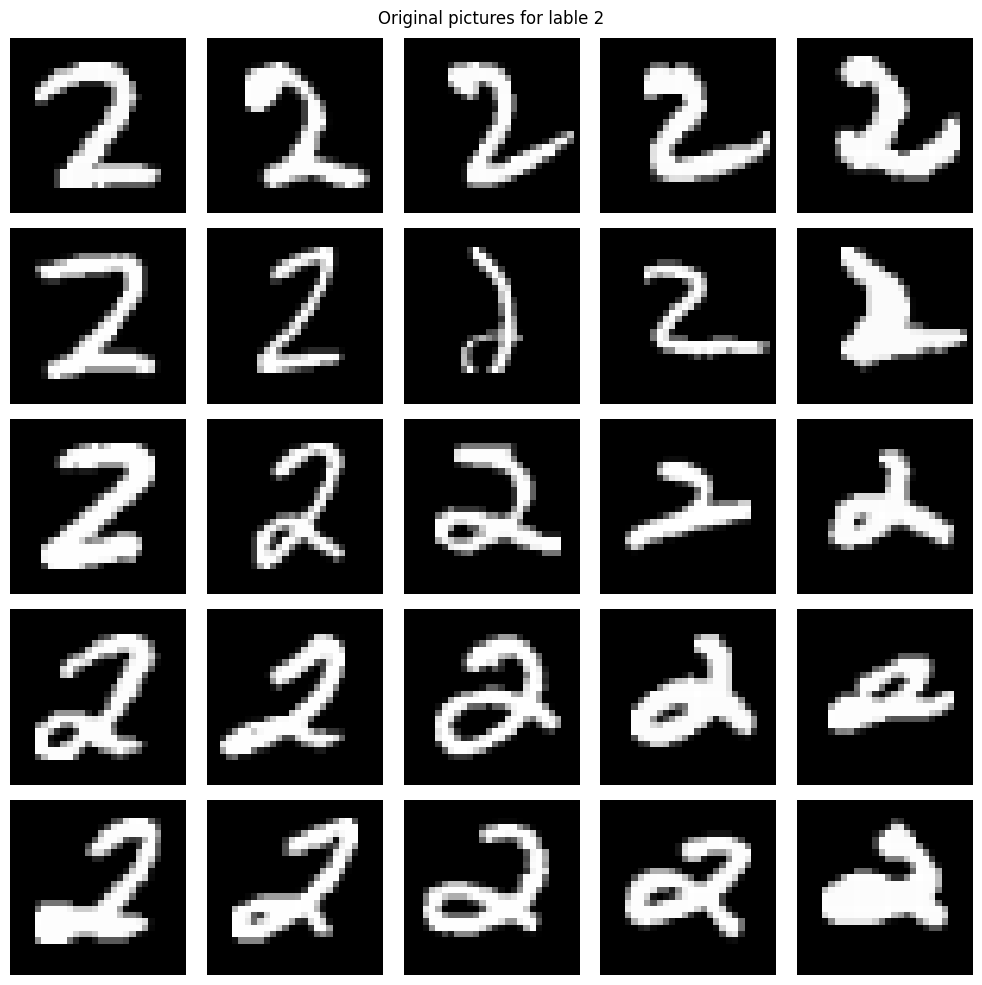

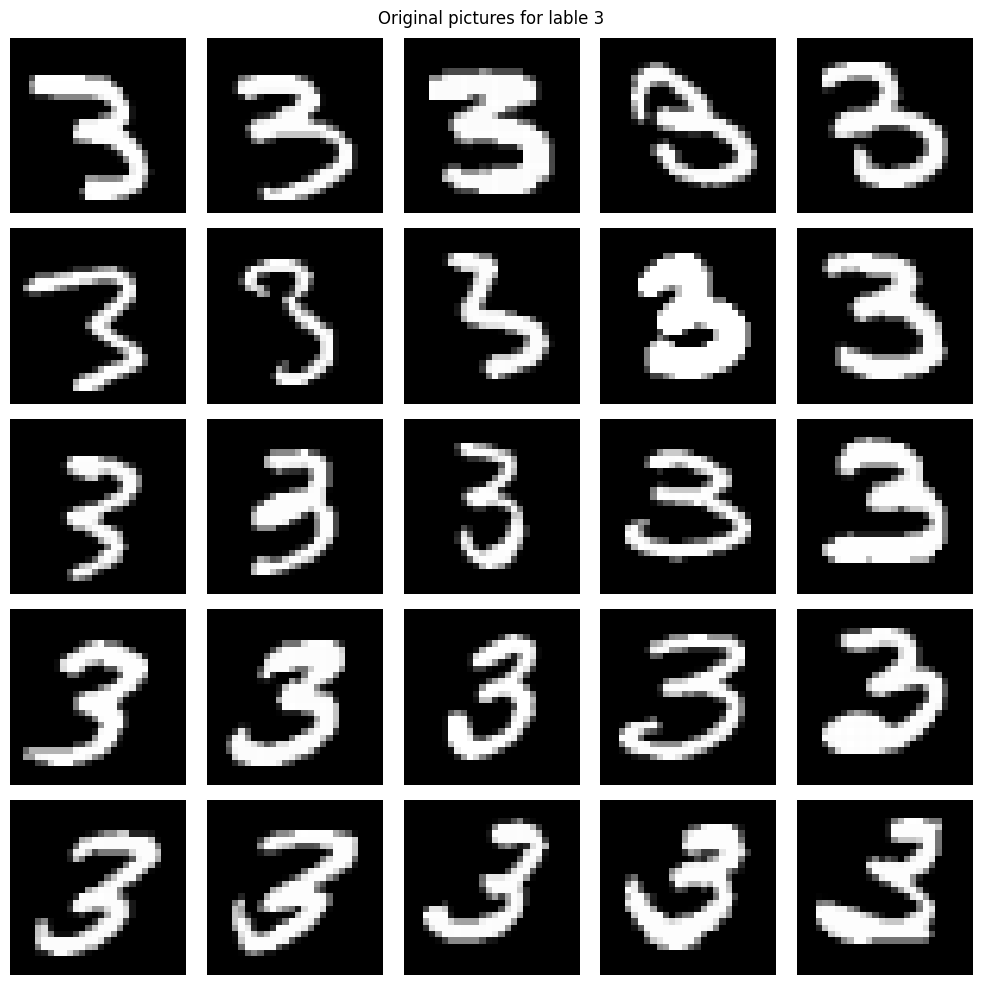

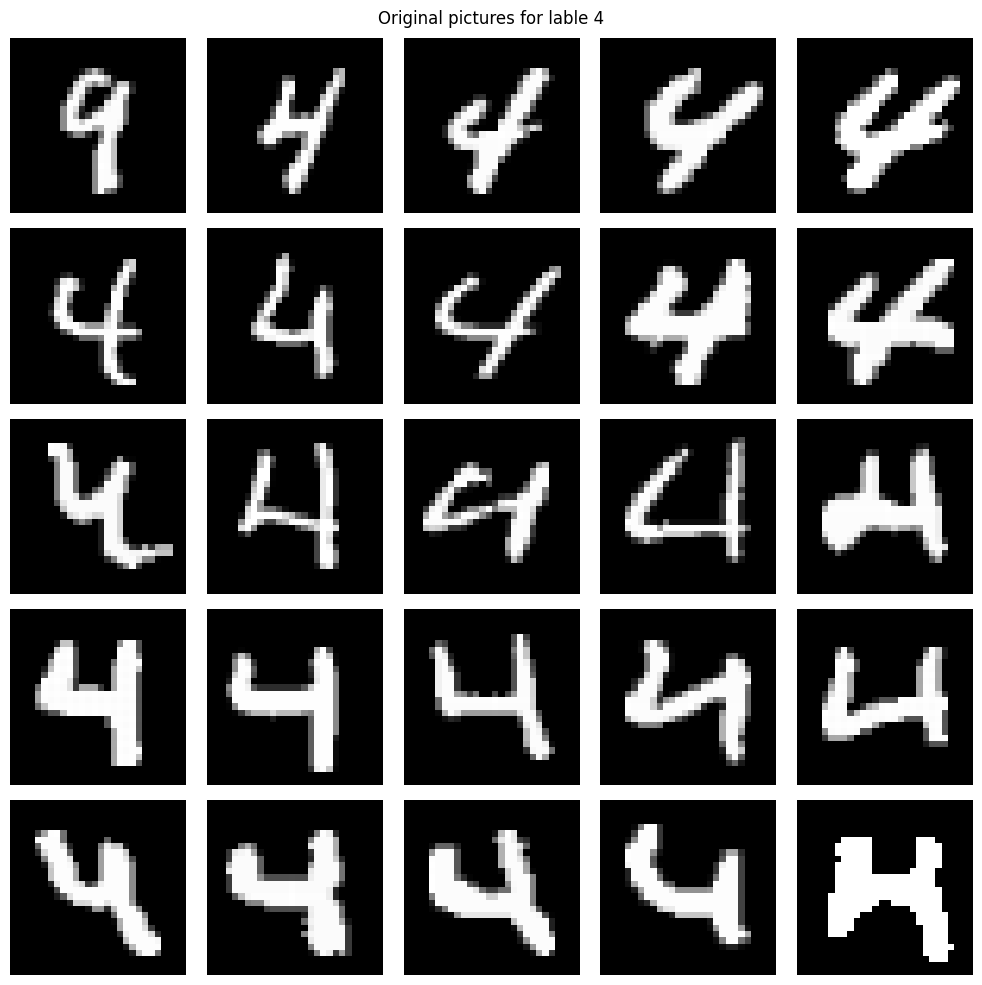

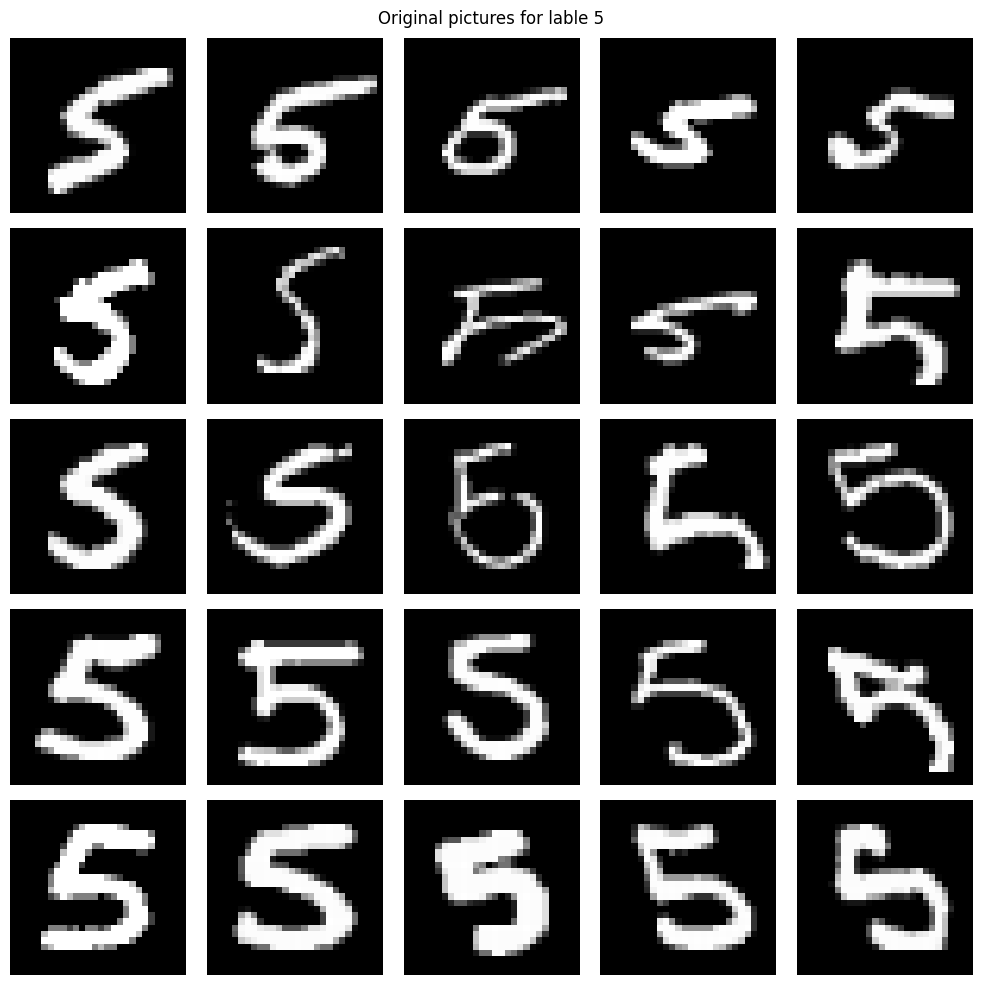

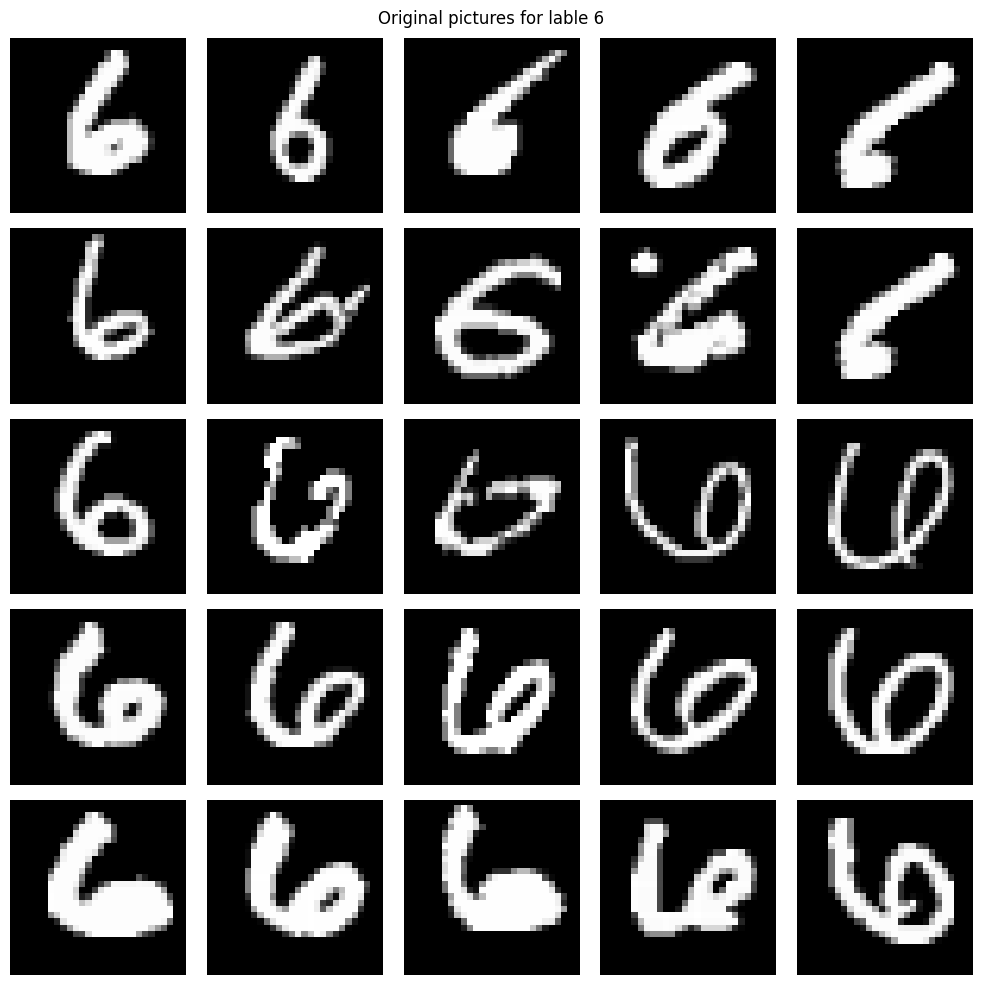

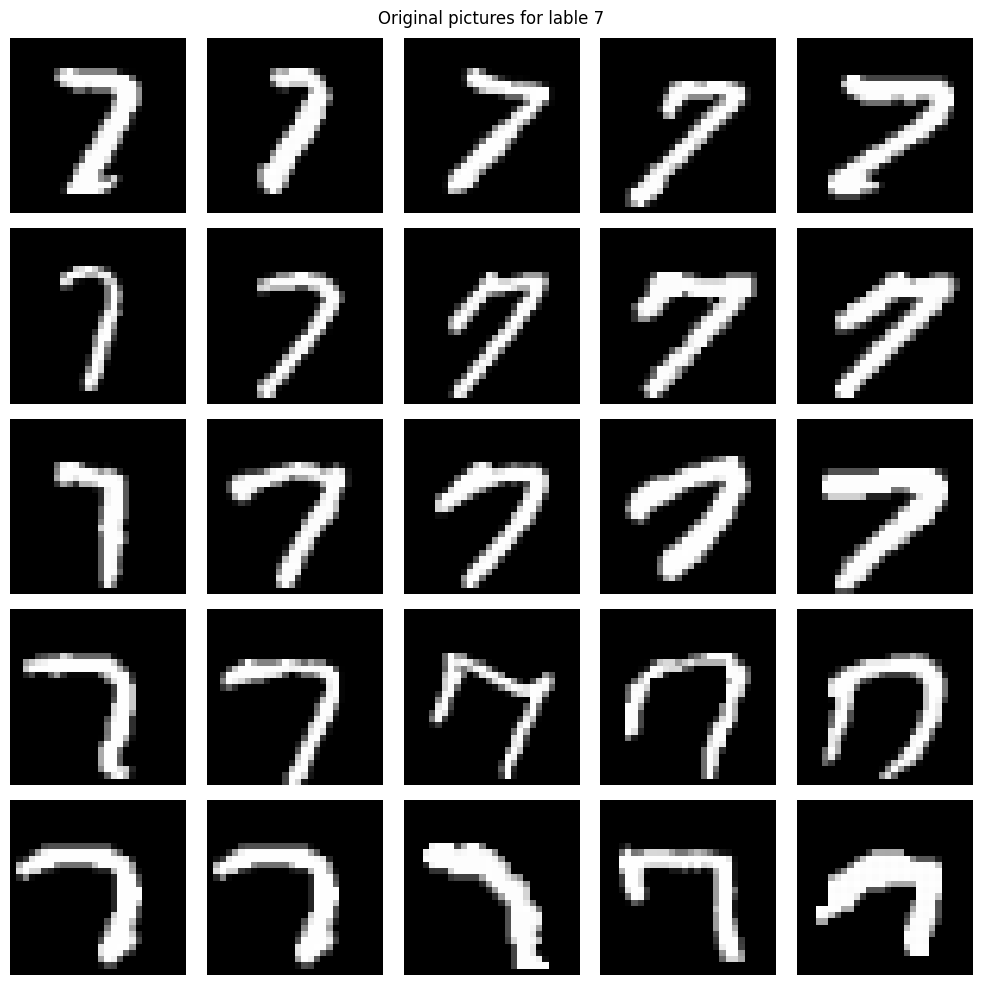

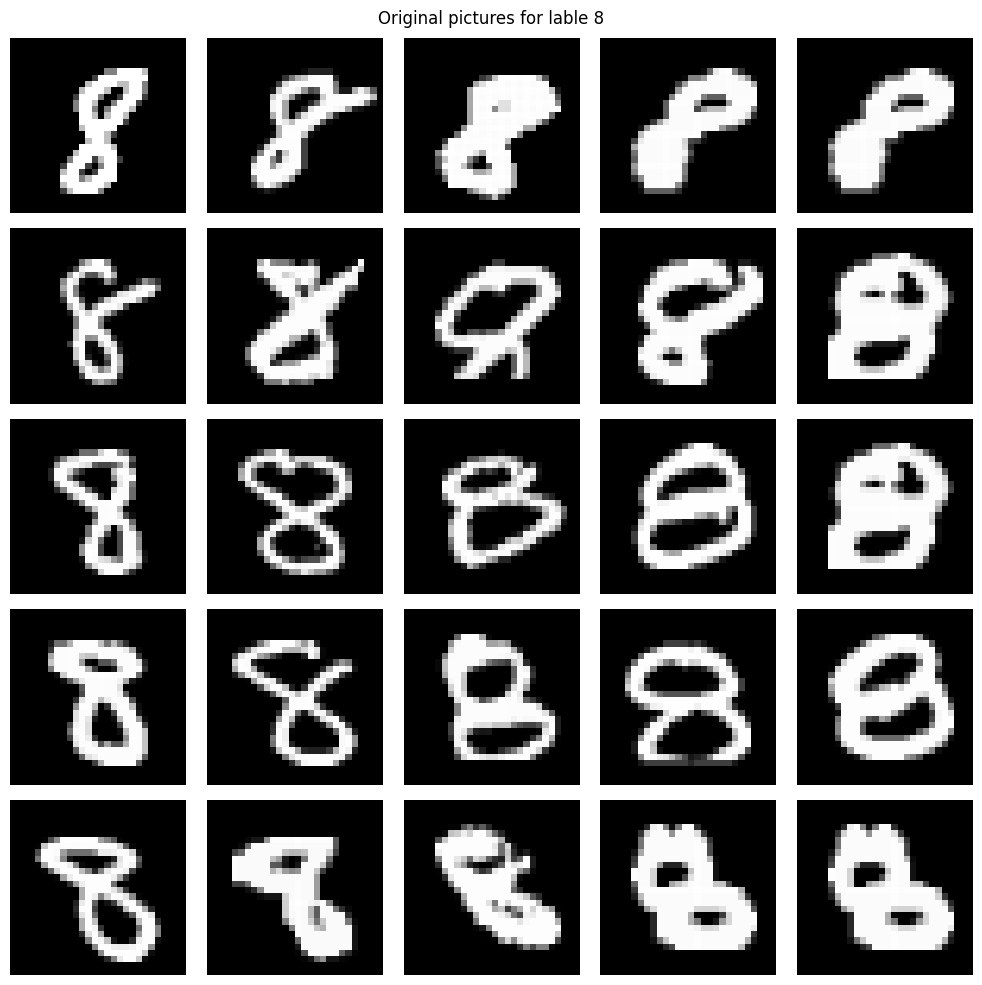

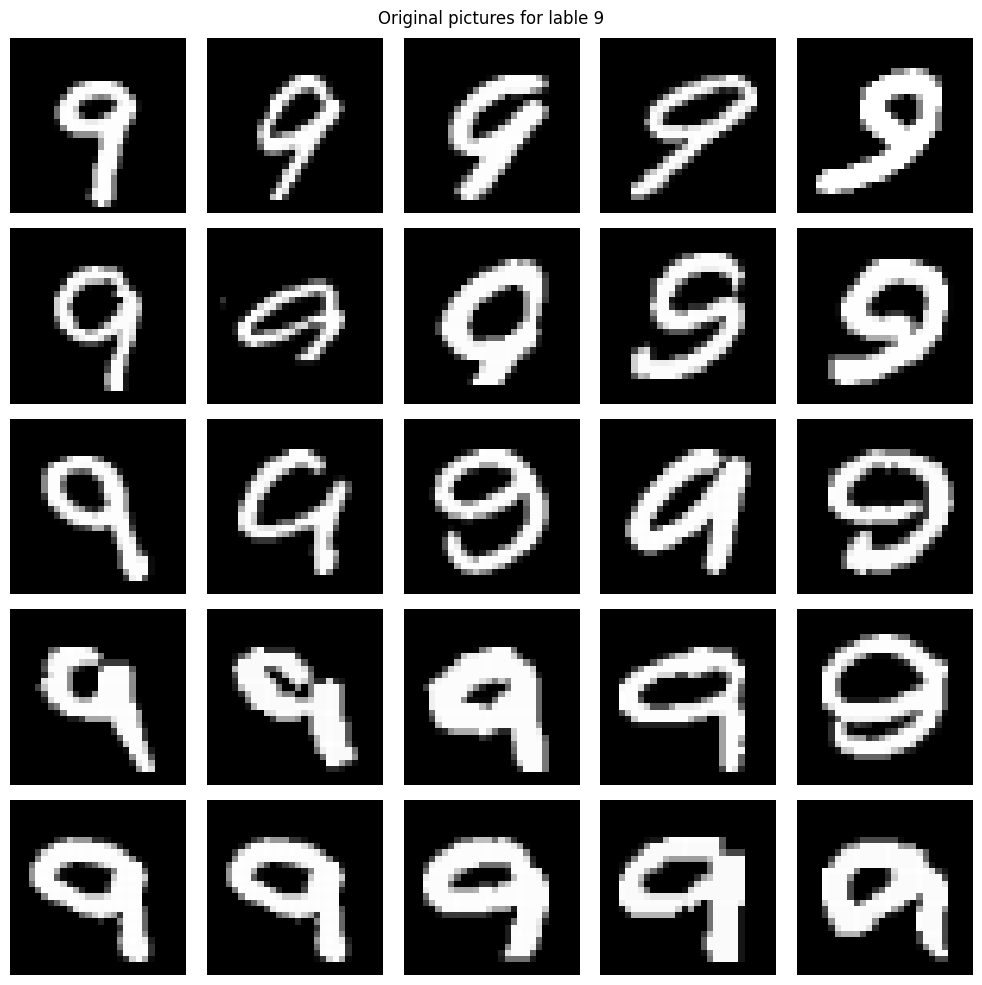

In [120]:
for u in range(10):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(PointsList[u]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(Sets2[u][idx], cmap='gray')
        plt.axis('off')
    
    plt.suptitle(f'Original pictures for lable {u}')
    plt.tight_layout()
    plt.show()